In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/CR1M/cosmic_g4_0000.root'

In [3]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [4]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,12.731841,-2712.904160,-132.821630,6982.100527,0,0,13,10750.850399,-2683.434573,-150.263857,7000.000000,3
1,4.837000,-2722.859871,-126.933574,6976.049304,0,0,13,10737.669933,-2712.904160,-132.821630,6982.100527,3
2,2.342634,-2728.577189,-123.549460,6972.573686,0,0,13,10732.350500,-2722.859871,-126.933574,6976.049304,3
3,10.142081,-2751.162211,-110.183971,6958.864657,0,0,13,10722.746066,-2728.577189,-123.549460,6972.573686,3
4,25.156361,-2806.523779,-77.472289,6925.288587,0,0,13,10711.191447,-2751.162211,-110.183971,6958.864657,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6460375,0.032553,3510.563436,4548.477334,6991.847115,999,1217,11,0.543551,3510.565335,4548.480442,6991.848838,1221
6460376,0.002757,3514.145638,4548.708412,6991.485418,999,1217,11,0.513756,3514.145595,4548.708414,6991.485385,1220
6460377,0.005610,3509.894072,4550.886610,6971.672935,999,1217,11,0.516609,3509.894123,4550.886651,6971.673105,1219
6460378,0.000013,3512.986566,4555.486253,6980.270155,999,1010,22,0.025754,3513.005290,4556.269888,6981.320786,1216


In [5]:
nEvents = df.event.max()+1

In [6]:
vertexList = []
for iEvt in range(nEvents):
    Evt = df[(df.event==iEvt)&(df.motherID==0)&(df.pdg==13)]
    trackList = Evt.trackID.unique()
    for t in trackList:
        iMuon = Evt[Evt.trackID==t].startE.idxmax()
        vertex = [ Evt.loc[iMuon].startX, Evt.loc[iMuon].startY, Evt.loc[iMuon].startZ ]
        vertexList.append( vertex )
vertexList

[[-2683.4345725364983, -150.26385663077235, 7000.0],
 [-2173.8219470717013, 4472.010820172727, 7000.0],
 [4997.41748906672, -3370.9012460894883, 7000.0],
 [2599.4379818439484, 1586.3661444745958, 7000.0],
 [400.43658344075084, 2399.529814720154, 7000.0],
 [4574.769565369934, 2443.0534313432872, 7000.0],
 [-244.70269680023193, -1076.8600599840283, 7000.0],
 [196.7211510054767, -3314.275781158358, 7000.0],
 [-1843.6237843707204, 3044.030147138983, 7000.0],
 [-3058.511493727565, 4437.167807482183, 7000.0],
 [-4696.647957898676, -1664.6075015887618, 7000.0],
 [-2783.3231282420456, -2868.0954105220735, 7000.0],
 [606.2825722619891, -3177.1535449661314, 7000.0],
 [1655.639314558357, -13.896902091801167, 7000.0],
 [799.31674990803, 3983.0485777929425, 7000.0],
 [2254.1852854192257, 1371.3115826249123, 7000.0],
 [-4370.823341887444, 1481.2557469122112, 7000.0],
 [-2034.7446925006807, -3825.9106664918363, 7000.0],
 [-3707.572487182915, 24.03038553893566, 7000.0],
 [1992.6719623617828, -3921.875

In [7]:
vertexArray = np.array( vertexList )

In [8]:
vertexArray[:,0]

array([-2683.43457254, -2173.82194707,  4997.41748907, ...,
        4566.89585466,  2959.96796573,  3508.94190604])

(0.0, 8000.0)

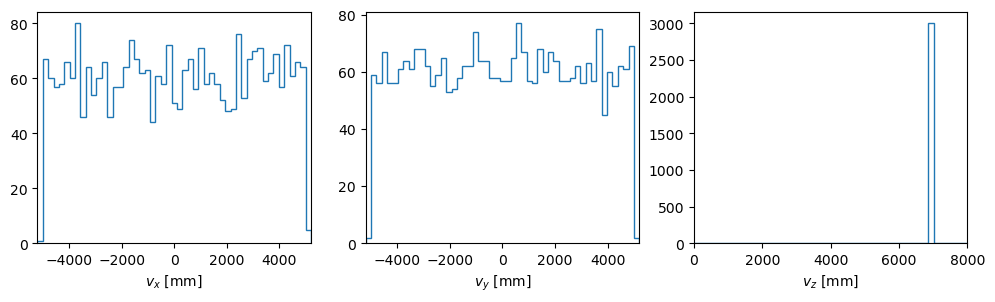

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3) )

ax[0].hist(vertexArray[:,0], bins = np.linspace(-5200, 5200, 52), histtype = 'step')
ax[0].set_xlabel(r'$v_x$ [mm]')
ax[0].set_xlim( [-5200., 5200.] )

ax[1].hist(vertexArray[:,1], bins = np.linspace(-5200, 5200, 52), histtype = 'step')
ax[1].set_xlabel(r'$v_y$ [mm]')
ax[1].set_xlim( [-5200., 5200.] )

ax[2].hist(vertexArray[:,2], bins = np.linspace(0, 8000, 50), histtype = 'step')
ax[2].set_xlabel(r'$v_z$ [mm]')
ax[2].set_xlim( [0., 8000.] )